<span style="font-size: 30px; font-weight: bold;">Import Libraries</span>

In [252]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

<span style="font-size: 30px; font-weight: bold;">Data Overview</span>

In [253]:
df=pd.read_csv("churn.csv")

In [254]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [256]:
df.isnull().sum().sum()

np.int64(0)

In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [258]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<span style="font-size: 30px; font-weight: bold;">Data Visualization</span>

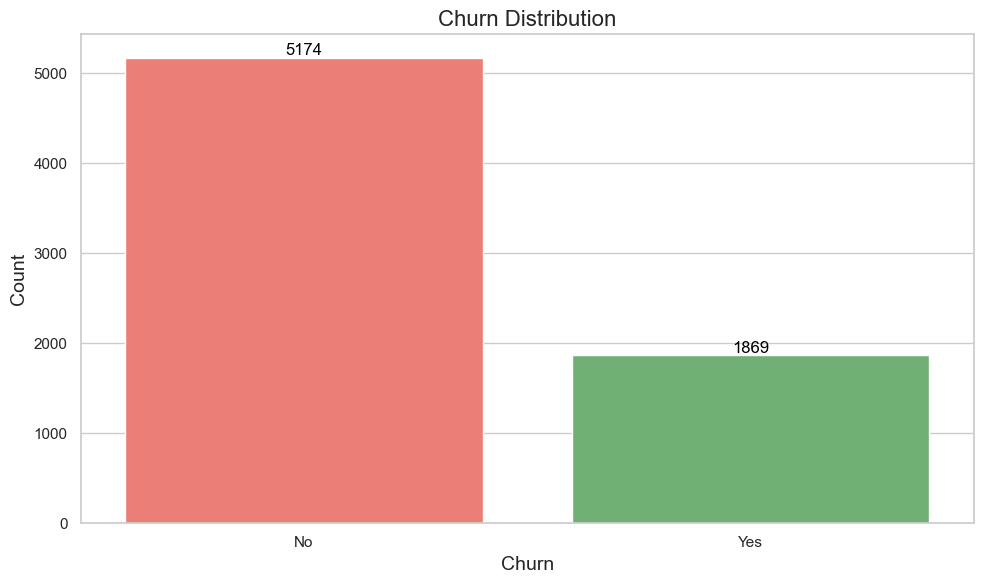

In [259]:
#Churn Distribution
plt.figure(figsize=(10,6))

ax = sns.countplot(
    x='Churn',
    data=df,
    palette={'Yes': '#66bb6a', 'No': '#ff6f61'}
)

plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.tight_layout()
plt.show()


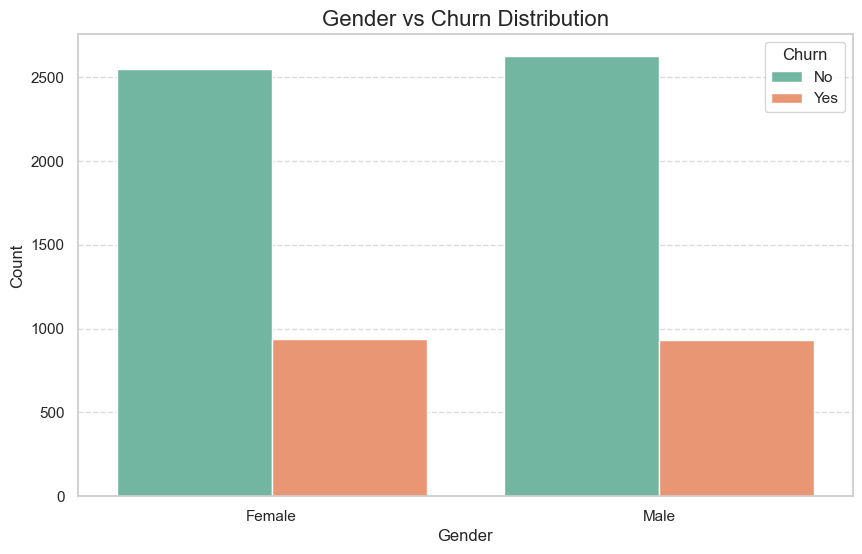

In [260]:
# Gender vs Churn distribution
plt.figure(figsize=(10,6))

sns.countplot(x='gender', data=df, hue='Churn', palette='Set2')

plt.title('Gender vs Churn Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


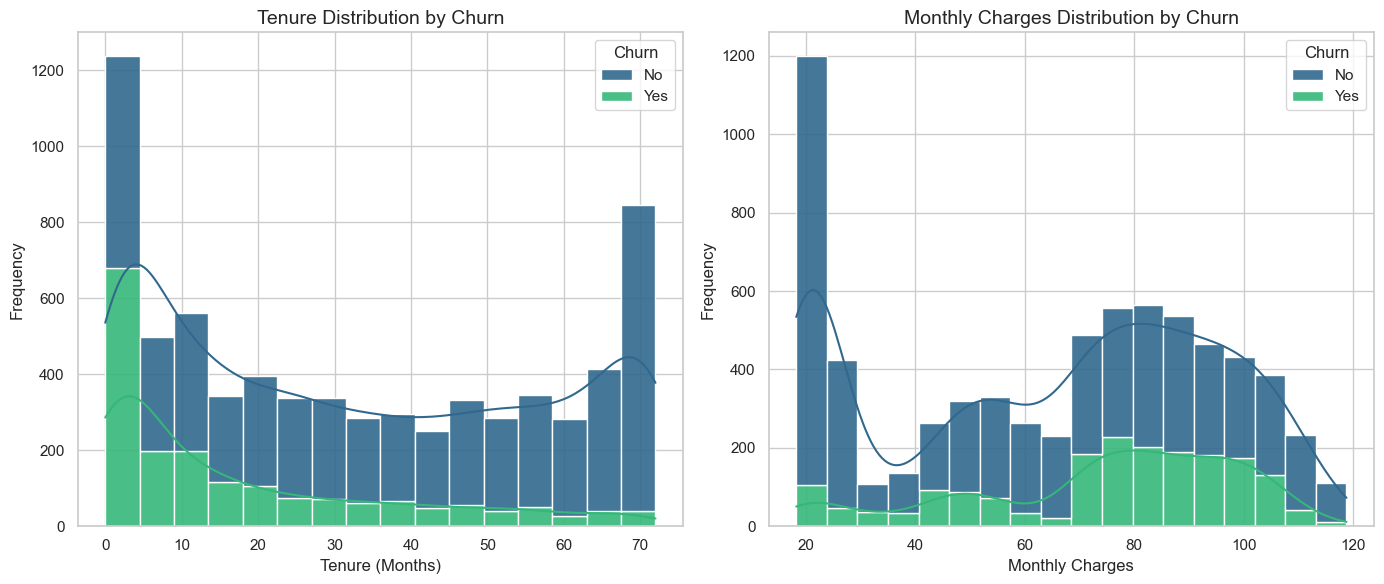

In [261]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='tenure', hue='Churn', palette='viridis', ax=axes[0], kde=True, multiple="stack", alpha=0.9)
axes[0].set_title('Tenure Distribution by Churn', fontsize=14)
axes[0].set_xlabel('Tenure (Months)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', palette='viridis', ax=axes[1], kde=True, multiple="stack", alpha=0.9)
axes[1].set_title('Monthly Charges Distribution by Churn', fontsize=14)
axes[1].set_xlabel('Monthly Charges', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


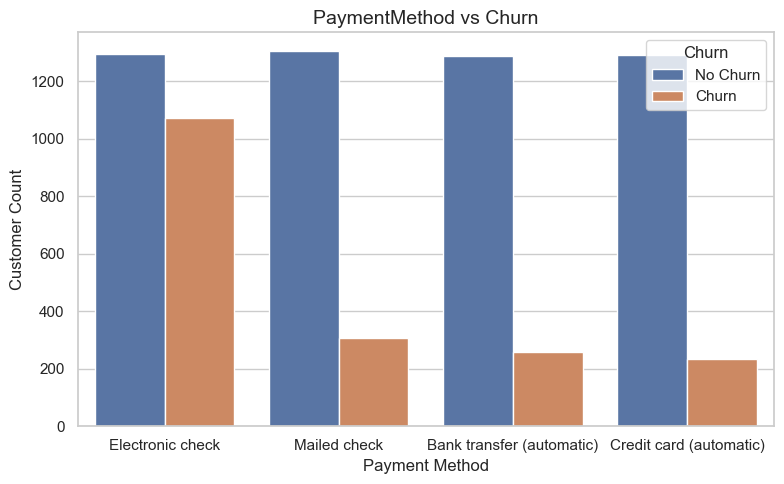

In [262]:
# Payment method vs Churn analysis
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

plt.title('PaymentMethod vs Churn', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.tight_layout()
plt.show()

<span style="font-size: 30px; font-weight: bold;">Data Cleaning & Preprocessing</span>

In [263]:
df.drop(columns = ["customerID"], inplace=True)

In [264]:
# Convert 'TotalCharges' to numeric, invalid values to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [265]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [266]:
# Fill missing 'TotalCharges' with the mode
df["TotalCharges"].fillna(df["TotalCharges"].mode()[0], inplace=True)

In [267]:
# Feature encoding
label_col = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
label_encoder = LabelEncoder()
for col in label_col:  
    df[col] = label_encoder.fit_transform(df[col])

ordinal_col = ["Contract", "PaymentMethod"]
ordinal_encoder = OrdinalEncoder()
df[ordinal_col] = ordinal_encoder.fit_transform(df[ordinal_col])

one_hot_encoder = ["MultipleLines", "InternetService", "OnlineSecurity", 
                 "OnlineBackup", "DeviceProtection", "TechSupport", 
                 "StreamingTV", "StreamingMovies"]
df = pd.get_dummies(df, columns=one_hot_encoder, drop_first=True, dtype=int)

<span style="font-size: 30px; font-weight: bold;">SMOTE for Class Imbalance</span>

In [268]:
X = df.drop("Churn", axis=1)
y = df.Churn

In [269]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
# Applying SMOTE to balance the class distribution
smote = SMOTE(sampling_strategy={1:3000}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")

Original class distribution: Counter({0: 4138, 1: 1496})
Resampled class distribution: Counter({0: 4138, 1: 3000})


<span style="font-size: 30px; font-weight: bold;">Feature Scaling</span>

In [271]:
# Feature scaling to standardize the data
scaler = StandardScaler()
columns_to_scale = ["tenure", "MonthlyCharges","TotalCharges"]
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])

X_train_resampled[columns_to_scale] = X_train_resampled_scaled
X_test[columns_to_scale] = X_test_scaled

<span style="font-size: 30px; font-weight: bold;">Logistic Regression Model Tuning</span>

In [272]:
# Logistic regression model setup and hyperparameter tuning
logreg = LogisticRegression(solver='saga')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 200],
    'penalty': ['l2', 'elasticnet'],
    'class_weight': ['balanced', None],
    'max_iter': [200, 500, 1000, 2000],
    'solver': ['saga', 'liblinear']
}
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                         'class_weight': ['balanced', None],
                         'max_iter': [200, 500, 1000, 2000],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')

<span style="font-size: 30px; font-weight: bold;">Model Evaluation</span>

In [273]:
# Displaying optimal hyperparameters and model performance
print("\n=== Logistic Regression Hyperparameters ===")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_resampled, grid_search.predict(X_train_resampled)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, grid_search.predict(X_test)))



=== Logistic Regression Hyperparameters ===
C: 200
class_weight: None
max_iter: 200
penalty: l2
solver: liblinear

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4138
           1       0.78      0.77      0.78      3000

    accuracy                           0.81      7138
   macro avg       0.81      0.81      0.81      7138
weighted avg       0.81      0.81      0.81      7138



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1036
           1       0.60      0.65      0.62       373

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

